# Analisis Prediktif: Prediksi Klasifikasi Jenis Kelamin

***Oleh : Kevin Chandra***

***Proyek Submission 1 - Machine Learning Terapan Dicoding***

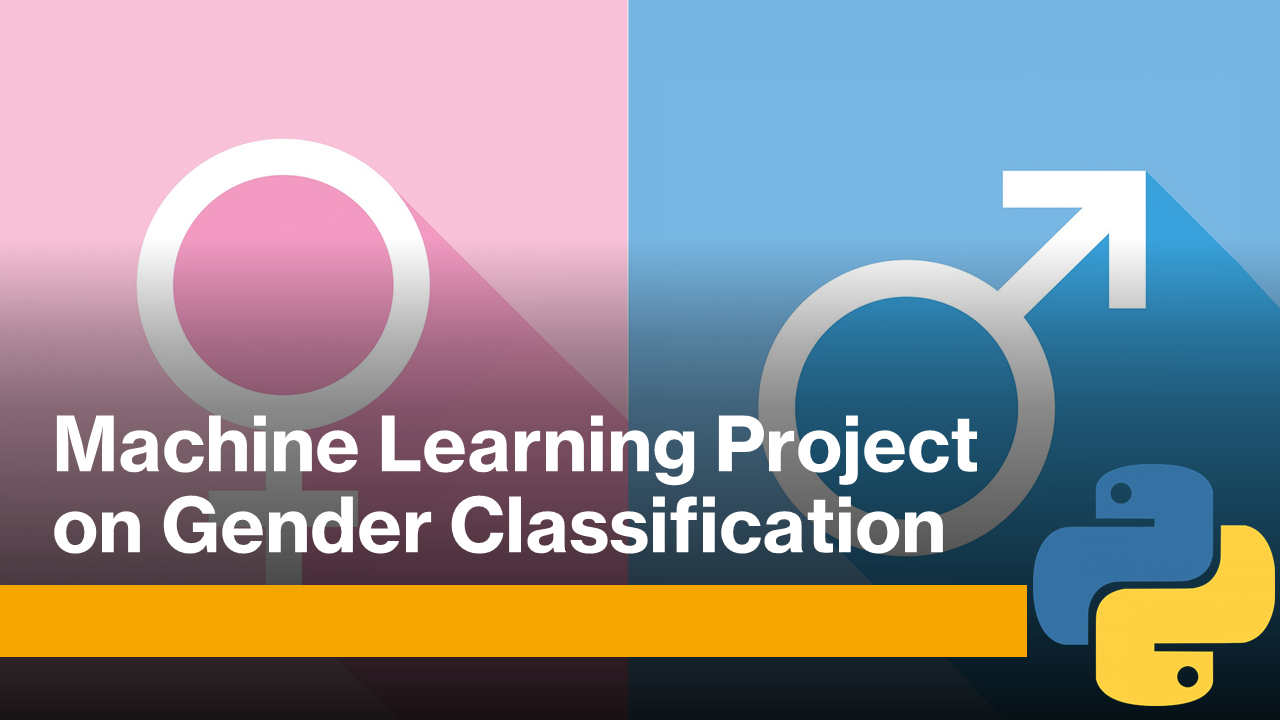

## **Pendahuluan**

Pada proyek ini, topik yang dibahas adalah mengenai jenis kelamin yang di buat untuk memprediksi jenis kelamin manusia berdasarkan karakteristik. Proyek ini dibuat untuk proyek Submission 1 - Machine Learning Terapan Dicoding.

## **1. Import Library dan Dataset yang digunakan**


Import Libraries yang akan digunakan.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Kode berikut untuk membaca file dan menampilkan file tersebut.

In [2]:
data_train = pd.read_csv("/gender.csv")
data_test = pd.DataFrame({'long_hair' ,
                       'forehead_width_cm' ,
                       'forehead_height_cm' ,
                       'nose_wide' ,
                       'nose_long' ,
                       'lips_thin' ,
                       'distance_nose_to_lip_long' , 
                       'gender'})
data_test = pd.read_csv("/gender.csv", skiprows=4000, nrows=1001)
data_test.columns = ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender']
data_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,15.4,6.1,1,1,1,0,Male
1,1,13.9,6.0,1,1,0,1,Male
2,1,13.6,6.2,1,0,1,1,Male
3,1,11.6,5.1,0,1,0,0,Female
4,1,12.4,5.8,1,1,1,1,Male
...,...,...,...,...,...,...,...,...
996,1,13.6,5.1,0,0,0,0,Female
997,1,11.9,5.4,0,0,0,0,Female
998,1,12.9,5.7,0,0,0,0,Female
999,1,13.2,6.2,0,0,0,0,Female


## **2. Data Understanding dan Visualisasi data**

Kode berikut untuk menunjukkan jumlah null value yang terdapat pada file.

In [3]:
data_train.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

Dikarenakan dataset tidak memiliki nilai null, maka data tersebut tidak saya modifikasi.

Kode berikut digunakan untuk mendeskripsikan dataset.

In [4]:
data_train.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


Kode berikut untuk menunjukkan diagram pie dari dataset.

   Samples count  Percentage
1           4349        87.0
0            652        13.0


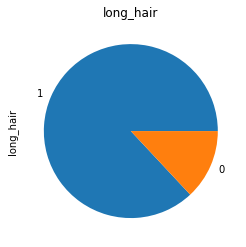

   Samples count  Percentage
0           2531        50.6
1           2470        49.4


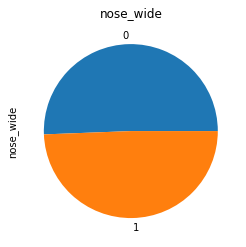

   Samples count  Percentage
1           2540        50.8
0           2461        49.2


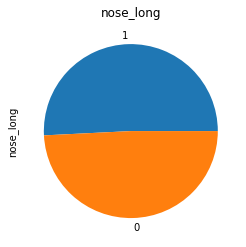

   Samples count  Percentage
0           2535        50.7
1           2466        49.3


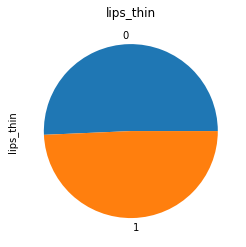

   Samples count  Percentage
0           2506        50.1
1           2495        49.9


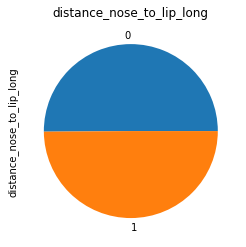

        Samples count  Percentage
Female           2501        50.0
Male             2500        50.0


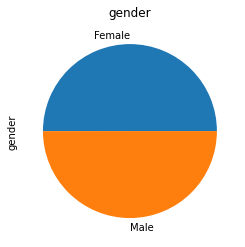

In [5]:
c = ['long_hair', 'nose_wide','nose_long','lips_thin', 'distance_nose_to_lip_long', 'gender',]

for i in range(len(c)):
    count = data_train[c[i]].value_counts()
    percent = 100*data_train[c[i]].value_counts(normalize=True)
    df = pd.DataFrame({'Samples count':count, 'Percentage':percent.round(1)})
    print(df)
    count.plot(kind='pie', title=c[i])
    plt.show()

## **3. Data Preparation**

Kode berikut digunakan untuk mengubah value kolom gender menjadi 0(female) dan 1(male) menggunakan OridnalEncoder.

In [6]:
from sklearn.preprocessing import OrdinalEncoder
object_cols = [col for col in data_train.columns if data_train[col].dtype == "object"]
object_cols2 = [col for col in data_test.columns if data_test[col].dtype == "object"]
ordinal_encoder = OrdinalEncoder()
data_train[object_cols] = ordinal_encoder.fit_transform(data_train[object_cols])
data_test[object_cols2] = ordinal_encoder.fit_transform(data_test[object_cols2])

Kode berikut untuk memperlihatkan tabel setelah dimodifikasi.

In [7]:
data_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1.0
1,0,14.0,5.4,0,0,1,0,0.0
2,0,11.8,6.3,1,1,1,1,1.0
3,0,14.4,6.1,0,1,1,1,1.0
4,1,13.5,5.9,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0.0
4997,1,11.9,5.4,0,0,0,0,0.0
4998,1,12.9,5.7,0,0,0,0,0.0
4999,1,13.2,6.2,0,0,0,0,0.0


Kode berikut digunakan untuk melakukan visualisasi menggunakan Correlation Matrix.

Text(0.5, 1.0, 'Correlation')

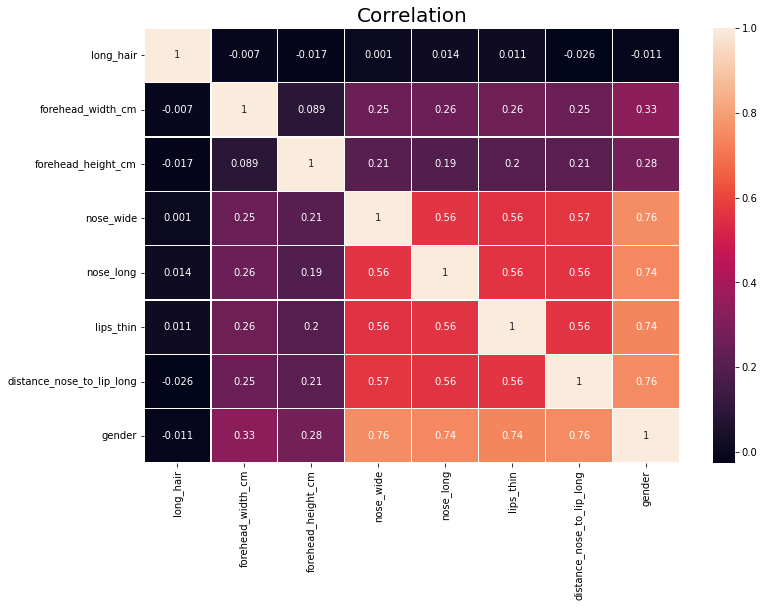

In [8]:
plt.figure(figsize=(12, 8))
correlation_matrix = data_train.corr().round(3)
sns.heatmap(data=correlation_matrix, annot=True,linewidths=0.25 )
plt.title("Correlation", size=20)


Kode berikut digunakan untuk melakukan drop kolom long_hair karena long_hair memiliki korelasi bernilai minus terhadap gender. Setelah itu saya menampilkan tabel yang sudah dimodifikasi.

In [9]:
data_train=data_train.drop(["long_hair"],axis =1)
data_test=data_test.drop(["long_hair"],axis =1)

data_train

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,1.0
1,14.0,5.4,0,0,1,0,0.0
2,11.8,6.3,1,1,1,1,1.0
3,14.4,6.1,0,1,1,1,1.0
4,13.5,5.9,0,0,0,0,0.0
...,...,...,...,...,...,...,...
4996,13.6,5.1,0,0,0,0,0.0
4997,11.9,5.4,0,0,0,0,0.0
4998,12.9,5.7,0,0,0,0,0.0
4999,13.2,6.2,0,0,0,0,0.0


Kode berikut digunakan untuk membagi data train dan validation.

In [10]:
from sklearn.model_selection import train_test_split
 
X = data_train.drop(["gender"],axis =1)
Y = data_train["gender"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Kode berikut digunakan untuk standarisasi kolom yang memiliki kategori banyak.

In [11]:
from sklearn.preprocessing import StandardScaler

num = ['forehead_width_cm','forehead_height_cm']
scaler = StandardScaler()
scaler.fit(X_train[num])
X_train[num] = scaler.transform(X_train.loc[:, num])
X_test[num] = scaler.transform(X_test.loc[:, num])
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
2715,-1.424904,-0.445565,0,0,1,0
788,0.285071,-0.629683,1,0,0,0
1457,1.185057,0.659141,1,1,1,0
3568,-1.514903,-0.445565,1,1,1,1
3529,-0.434919,1.027377,1,1,1,1
...,...,...,...,...,...,...
4931,1.275056,-1.182036,0,1,1,1
3264,0.555067,1.763848,1,1,0,1
1653,1.005060,0.475024,0,1,0,0
2607,-1.064909,1.579730,1,1,1,1


## **4. Modelling**

Kode berikut digunakan untuk mengimpor library model dan evaluasi metrik.

---



In [12]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Kode berikut digunakan untuk melatih model XGBClassifier dengan X_train dan Y_train.

In [13]:
XGBModel = XGBClassifier()
XGBModel.fit(X_train, Y_train, verbose=False)

XGBPredict = XGBModel.predict(X_test)
XGBPredict

array([0., 1., 1., ..., 0., 1., 0.])

Kode berikut digunakan untuk menampilkan hasil dari XGBClassifier setelah dilatih.

In [14]:
XGBAcc= accuracy_score(Y_test,XGBPredict)
XGBPrec = precision_score(Y_test,XGBPredict)
XGBRecall = recall_score(Y_test,XGBPredict)
XGBF1 = f1_score(Y_test,XGBPredict)

print('XGBClassifier akurasi: %.2f' % XGBAcc)
print('XGBClassifier presisi: %.3f' % XGBPrec)
print('XGBClassifier recall: %.3f' % XGBRecall)
print('XGBClassifier F1: %.3f' % XGBF1)

XGBClassifier akurasi: 0.97
XGBClassifier presisi: 0.981
XGBClassifier recall: 0.954
XGBClassifier F1: 0.967


Kode berikut digunakan untuk melatih model LogisticRegression dengan X_train dan Y_train.

In [15]:
log=LogisticRegression()
log.fit(X_train, Y_train)

LRPredict=log.predict(X_test)
LRPredict

array([0., 1., 1., ..., 0., 1., 0.])

Kode berikut digunakan untuk menampilkan hasil dari LogisticRegression setelah dilatih.

In [16]:
LRAcc= accuracy_score(Y_test,LRPredict)
LRPrec = precision_score(Y_test,LRPredict)
LRRecall = recall_score(Y_test,LRPredict)
LRF1 = f1_score(Y_test,LRPredict)


print('LogisticRegression akurasi: %.2f' % LRAcc)
print('LogisticRegression presisi: %.3f' % LRPrec)
print('LogisticRegression recall: %.3f' % LRRecall)
print('LogisticRegression F1: %.3f' % LRF1)

LogisticRegression akurasi: 0.97
LogisticRegression presisi: 0.967
LogisticRegression recall: 0.961
LogisticRegression F1: 0.964


## **5. Hasil perbandingan kedua model**

In [17]:
compare = pd.DataFrame({'Akurasi': [XGBAcc, LRAcc], 'Presisi': [XGBPrec, LRPrec], 'Recall': [XGBRecall, LRRecall], 'F1 Score': [XGBF1, LRF1]}, 
                       index=['XGBClassifier','LogsiticRegression'])
compare

,Akurasi,Presisi,Recall,F1 Score
XGBClassifier,0.969031,0.980851,0.954451,0.967471
LogsiticRegression,0.965035,0.966667,0.960663,0.963655


Dari hasil di atas saya dapat menyimpulkan bahwa model XGBClassifier lebih baik dari model LogisticRegression.

## **6. Melakukan prediksi pada data test**

Kode berikut digunakan untuk melakukan skala pada data_test.

In [18]:
num = ['forehead_width_cm','forehead_height_cm']
data_test=data_test.drop(["gender"],axis =1)
scaler.fit(data_test[num])
data_test[num] = scaler.transform(data_test.loc[:, num])
data_test

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1.950769,0.337194,1,1,1,0
1,0.622930,0.149468,1,1,0,1
2,0.357363,0.524920,1,0,1,1
3,-1.413090,-1.540064,0,1,0,0
4,-0.704909,-0.225984,1,1,1,1
...,...,...,...,...,...,...
996,0.357363,-1.540064,0,0,0,0
997,-1.147522,-0.976887,0,0,0,0
998,-0.262296,-0.413709,0,0,0,0
999,0.003272,0.524920,0,0,0,0


Kode berikut digunakan untuk memprediksi data_test menggunakan model terbaik, yaitu XGBClassifier dan menampilkan hasilnya.

In [19]:
predict = XGBModel.predict(data_test)
result = pd.DataFrame({'forehead_width_cm': data_test.forehead_width_cm,
                       'forehead_height_cm': data_test.forehead_height_cm,
                       'nose_wide': data_test.nose_wide,
                       'nose_long': data_test.nose_long,
                       'lips_thin': data_test.lips_thin,
                       'distance_nose_to_lip_long': data_test.distance_nose_to_lip_long,
                       'gender': predict})
result.head(10)

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.950769,0.337194,1,1,1,0,1.0
1,0.622930,0.149468,1,1,0,1,1.0
2,0.357363,0.524920,1,0,1,1,1.0
3,-1.413090,-1.540064,0,1,0,0,0.0
4,-0.704909,-0.225984,1,1,1,1,1.0
5,-0.262296,0.900371,0,0,0,0,0.0
6,-0.527864,1.463549,1,1,1,1,1.0
7,-0.881954,-1.540064,0,0,0,0,0.0
8,-1.058999,0.712646,1,1,1,0,1.0
9,-0.881954,-1.164613,0,0,0,0,0.0


Dalam 10 data prediksi yang ditampilkan, terdapat 6 merupakan laki-laki, dan 4 orang perempuan.

